In [1]:
import pandas as pd
import numpy as np

# Step 1: Create synthetic dataset
np.random.seed(42)
years = np.arange(2000, 2022, 4)  # World Cup happens every 4 years
teams = ['Team1', 'Team2', 'Team3', 'Team4', 'Team5', 'Team6']

data = {
    'Year': np.random.choice(years, 300),
    'Team': np.random.choice(teams, 300),
    'Opponent': np.random.choice(teams, 300),
    'Goals_Scored': np.random.randint(0, 6, 300),
    'Goals_Conceded': np.random.randint(0, 6, 300),
    'Possession': np.random.uniform(30, 70, 300).round(2),
    'Pass_Accuracy': np.random.uniform(60, 90, 300).round(2)
}
df = pd.DataFrame(data)

# Calculate match result (Win, Draw, Lose)
df['Match_Result'] = np.where(df['Goals_Scored'] > df['Goals_Conceded'], 'Win',
                              np.where(df['Goals_Scored'] == df['Goals_Conceded'], 'Draw', 'Lose'))

print("Synthetic dataset created.")
df.to_csv('/content/fifa_worldcup_synthetic.csv', index=False)
df.head()


Synthetic dataset created.


,Year,Team,Opponent,Goals_Scored,Goals_Conceded,Possession,Pass_Accuracy,Match_Result
0,2012,Team6,Team1,4,3,30.21,66.03,Win
1,2016,Team1,Team4,4,3,34.12,80.80,Win
2,2008,Team3,Team4,1,3,42.58,84.64,Lose
3,2016,Team1,Team5,3,4,62.30,61.24,Lose
4,2016,Team5,Team1,1,4,68.48,80.11,Lose


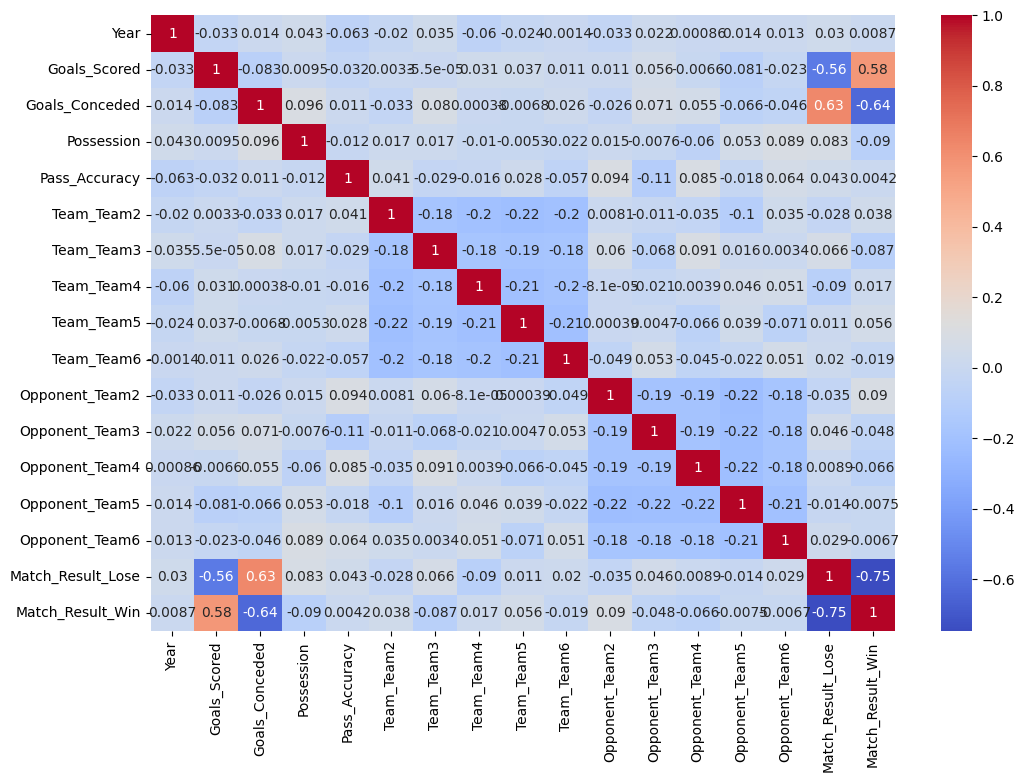

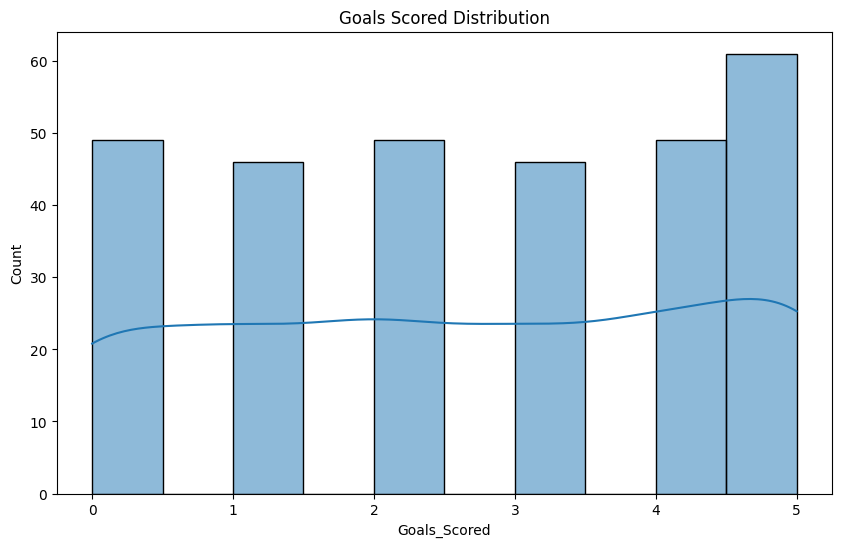

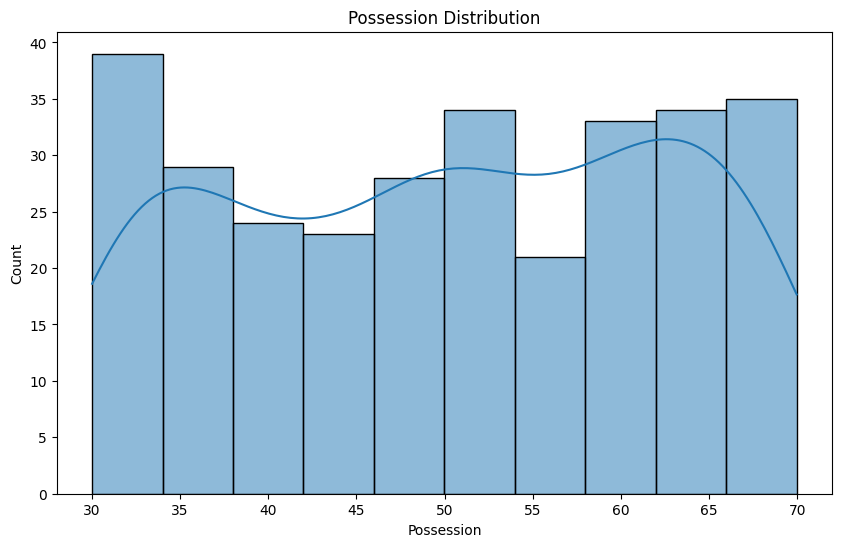

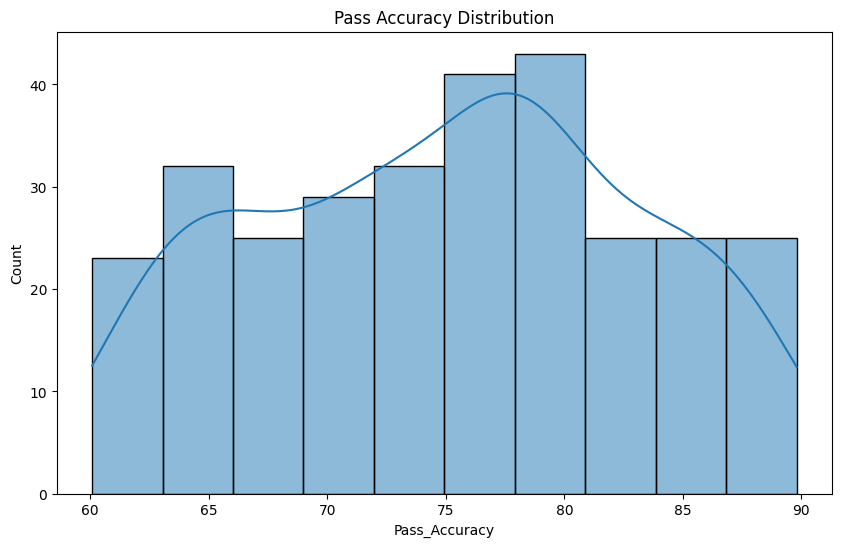

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the synthetic dataset
df = pd.read_csv('/content/fifa_worldcup_synthetic.csv')

# Data Preprocessing
# Handle missing values (if any)
df = df.dropna()

# Convert categorical variables to numerical
df = pd.get_dummies(df, drop_first=True)

# Exploratory Data Analysis (EDA)
# Plotting correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Visualize goals scored distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Goals_Scored'], kde=True)
plt.title('Goals Scored Distribution')
plt.show()

# Visualize possession distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Possession'], kde=True)
plt.title('Possession Distribution')
plt.show()

# Visualize pass accuracy distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Pass_Accuracy'], kde=True)
plt.title('Pass Accuracy Distribution')
plt.show()


Accuracy: 1.0


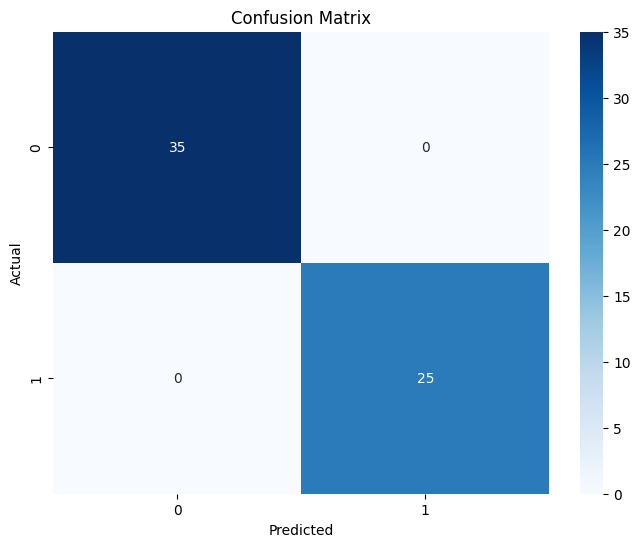

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Features and target variable
X = df[['Goals_Scored', 'Goals_Conceded', 'Possession', 'Pass_Accuracy']]
y = df['Match_Result_Win']  # We will predict whether the match result is a win

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
